In [ ]:
import gym
import stable_baselines3 as sb3
from src.pv_env import PVEnv, PVEnvDiscrete
from src.reward import RewardDeltaPower
import os

PV_PARAMS_PATH = os.path.join("parameters", "01_pvarray.json")
WEATHER_TRAIN_PATH = os.path.join("data", "weather_sim.csv")
WEATHER_TEST_PATH = os.path.join("data", "weather_real.csv")
PVARRAY_CKP_PATH = os.path.join("data", "01_pvarray_iv.json")
AGENT_CKP_PATH = os.path.join("models", "02_mppt_ac.tar")
LEARNING_RATE = 0.00001
ENTROPY_BETA = 0.001
GAMMA = 0.9
N_STEPS = 4
BATCH_SIZE = 16

env = PVEnv.from_file(
    PV_PARAMS_PATH,
    WEATHER_TRAIN_PATH,
    pvarray_ckp_path=PVARRAY_CKP_PATH,
    states=["v_norm", "i_norm", "deg"],
    reward_fn=RewardDeltaPower(1, 0.9),
)
test_env = PVEnv.from_file(
    PV_PARAMS_PATH,
    WEATHER_TRAIN_PATH,
    pvarray_ckp_path=PVARRAY_CKP_PATH,
    states=["v_norm", "i_norm", "deg"],
    reward_fn=RewardDeltaPower(1, 0.9),
    v0 = 12.0,
)

# env = sb3.common.vec_env.VecNormalize()
# vec_env = sb3.common.vec_env.dummy_vec_env.DummyVecEnv([lambda: env])
# norm_env = sb3.common.vec_env.VecNormalize(vec_env)

In [ ]:
def test_agent(agent, test_env):
    obs = test_env.reset()
    for i in range(832):
        action, _ = agent.predict(obs, deterministic=True)
        obs, reward, done, info = test_env.step(action)
        if done:
            break
    test_env.render_vs_true(po=True)

In [206]:
a2c_agent = sb3.A2C(
    policy="MlpPolicy",
    env=env,
    learning_rate=1e-4,
    device='cpu',
    )
ddpg_agent = sb3.DDPG(
    policy="MlpPolicy",
    env=env,
    learning_rate=1e-4,
    device='cpu',
    )
ppo_agent = sb3.PPO(
    policy="MlpPolicy",
    env=env,
    learning_rate=1e-4,
    device='cpu',
    )
sac_agent = sb3.SAC(
    policy="MlpPolicy",
    env=env,
    learning_rate=1e-4,
    device='cpu',
    )
td3_agent = sb3.TD3(
    policy="MlpPolicy",
    env=env,
    learning_rate=1e-4,
    device='cpu',
    )


Eval num_timesteps=1000, episode_reward=-130.36 +/- 0.00
Episode length: 833.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=133.59 +/- 0.00
Episode length: 833.00 +/- 0.00
New best mean reward!
Eval num_timesteps=3000, episode_reward=129.13 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-128.35 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=100.70 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=111.91 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=117.35 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=54.38 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=73.70 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=14.97 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=11000, episode_reward=-44.06 +/- 0.00
Episode length: 833

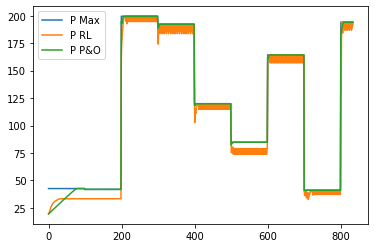

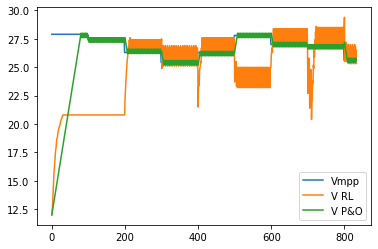

INFO 2020-11-23 18:50:46,540 PO Efficiency=97.42135050009817
INFO 2020-11-23 18:50:46,541 RL Efficiency=91.90032957612371
Wall time: 6min 7s


In [207]:
%%time
a2c_agent.learn(
    total_timesteps=100_000,
    eval_env=test_env,
    n_eval_episodes=1,
    eval_freq=1000,
    reset_num_timesteps=False,
)
test_agent(a2c_agent, test_env)

In [208]:
%%time
ddpg_agent.learn(
    total_timesteps=100_000,
    eval_env=test_env,
    n_eval_episodes=1,
    eval_freq=1000,
    reset_num_timesteps=False,
)
test_agent(ddpg_agent, test_env)

Eval num_timesteps=1000, episode_reward=-19.51 +/- 0.00
Episode length: 833.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-5146.32 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-19.51 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-19.51 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-19.51 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-19.51 +/- 0.00
Episode length: 833.00 +/- 0.00


KeyboardInterrupt: 

Eval num_timesteps=1000, episode_reward=58.16 +/- 0.00
Episode length: 833.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=58.16 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=56.05 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=56.05 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=108.99 +/- 0.00
Episode length: 833.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6000, episode_reward=108.99 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=60.63 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=60.63 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=119.91 +/- 0.00
Episode length: 833.00 +/- 0.00
New best mean reward!
Eval num_timesteps=10000, episode_reward=119.91 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=11000, episode_reward=73.59 +/- 0.00
Epi

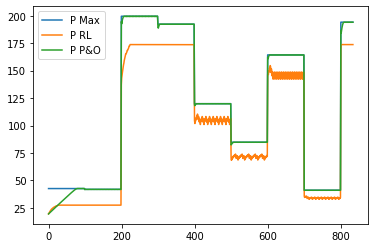

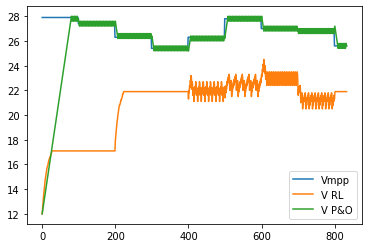

INFO 2020-11-23 18:58:19,370 PO Efficiency=97.42135050009817
INFO 2020-11-23 18:58:19,371 RL Efficiency=81.40145943926161
Wall time: 5min 33s


In [209]:
%%time
ppo_agent.learn(
    total_timesteps=100_000,
    eval_env=test_env,
    n_eval_episodes=1,
    eval_freq=1000,
    reset_num_timesteps=False,
)
test_agent(ppo_agent, test_env)

In [210]:
%%time
sac_agent.learn(
    total_timesteps=100_000,
    eval_env=test_env,
    n_eval_episodes=1,
    eval_freq=1000,
    reset_num_timesteps=False,
)
test_agent(sac_agent, test_env)

Eval num_timesteps=1000, episode_reward=-2152.62 +/- 0.00
Episode length: 833.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-3510.25 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-230.13 +/- 0.00
Episode length: 833.00 +/- 0.00
New best mean reward!
Eval num_timesteps=4000, episode_reward=-96.13 +/- 0.00
Episode length: 833.00 +/- 0.00
New best mean reward!
Eval num_timesteps=5000, episode_reward=-73.49 +/- 0.00
Episode length: 833.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6000, episode_reward=-103.77 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-50.83 +/- 0.00
Episode length: 833.00 +/- 0.00
New best mean reward!
Eval num_timesteps=8000, episode_reward=-44.13 +/- 0.00
Episode length: 833.00 +/- 0.00
New best mean reward!
Eval num_timesteps=9000, episode_reward=15.83 +/- 0.00
Episode length: 833.00 +/- 0.00
New best mean reward!
Eval num_timesteps=10000, episode_reward=-43.34 +

KeyboardInterrupt: 

Eval num_timesteps=1000, episode_reward=-19.51 +/- 0.00
Episode length: 833.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-19.51 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-68.80 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-6103.67 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-19.51 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-23.92 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-195.04 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-155.43 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-1328.65 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-189.25 +/- 0.00
Episode length: 833.00 +/- 0.00
Eval num_timesteps=11000, episode_reward=-62.08 +/- 0.00
Episode length: 833.00 +/- 0.00
E

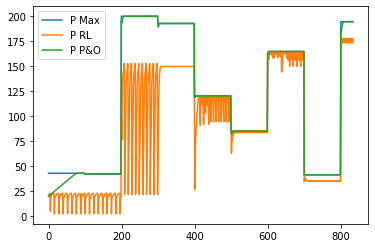

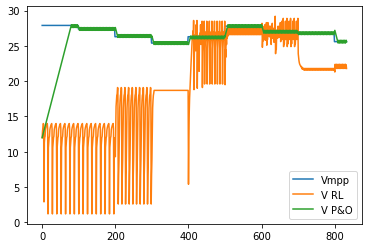

INFO 2020-11-23 19:59:09,618 PO Efficiency=97.42135050009817
INFO 2020-11-23 19:59:09,620 RL Efficiency=75.21100053540503
Wall time: 32min 7s


In [211]:
%%time
td3_agent.learn(
    total_timesteps=100_000,
    eval_env=test_env,
    n_eval_episodes=1,
    eval_freq=1000,
    reset_num_timesteps=False,
)
test_agent(td3_agent, test_env)